In [49]:
#!pip install plotly
#!pip install pycountry

In [50]:
#!pip install plotly==5.3.1

In [51]:
#!pip install xlrd

In [52]:
import openpyxl
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re

#plotly.__version__ # '5.6.0'

In [53]:
openpyxl.__version__

'3.0.9'

## Cleaning and EDA

In [54]:
lifeexp = pd.read_excel("../data/gapminder_lifeexpectancy.xlsx", index_col = 0)
pop = pd.read_excel("../data/gapminder_population.xlsx", index_col = 0)
totfert = pd.read_csv("../data/gapminder_total_fertility.csv", index_col = 0)
co2 = pd.read_csv("../data/co2_emissions_tonnes_per_person.csv", index_col = 0)
income_pp = pd.read_csv("../data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv", index_col=0)

continents = pd.read_csv("../data/continents.csv", index_col = 0, sep=";")

In [55]:
co2.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120


In [56]:
lifeexp.head(2)

,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,1809.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72


In [57]:
pop.head(2)

,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0,1860.0,1870.0,1880.0,1890.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0


In [58]:
totfert.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47


In [64]:
df_sub = totfert[["1950", "1955", "2000"]]
df_sub.head()

,1950,1955,2000
Total fertility rate,,,
Abkhazia,NaN,NaN,NaN
Afghanistan,7.67,7.67,7.73
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,5.80,6.37,2.38
Algeria,7.65,7.65,2.51


In [67]:
df_sub = df_sub.loc[["Germany", "India", "Bulgaria", "Kenya"]]
df_sub

,1950,1955,2000
Total fertility rate,,,
Germany,2.07,2.21,1.35
India,5.89,5.91,3.15
Bulgaria,2.66,2.39,1.18
Kenya,7.36,7.64,5.01


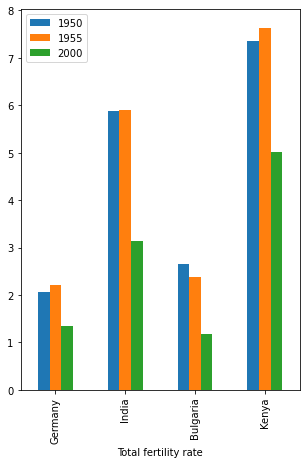

In [68]:
from matplotlib import pyplot as plt
df_sub.plot.bar(figsize = (5,7))
plt.savefig("bars.png")

<AxesSubplot:xlabel='Total fertility rate'>

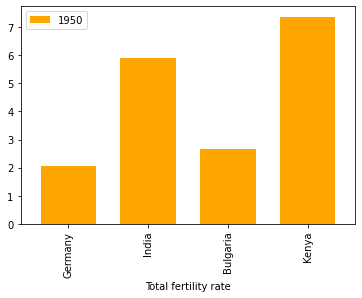

In [69]:
df_sub.plot.bar(y="1950", width = 0.7, color ="orange")

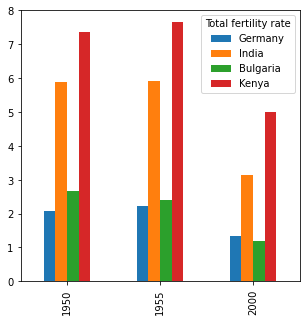

In [70]:
df_sub.transpose().plot.bar(figsize = (5,5))
plt.savefig("bars.png")

In [8]:
lifeexp.shape, pop.shape, totfert.shape

((260, 217), (275, 81), (260, 216))

In [9]:
lifeexp.columns, pop.columns, totfert.columns
# years in total fertility are strings

(Float64Index([1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0,
               1808.0, 1809.0,
               ...
               2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
               2015.0, 2016.0],
              dtype='float64', length=217),
 Float64Index([1800.0, 1810.0, 1820.0, 1830.0, 1840.0, 1850.0, 1860.0, 1870.0,
               1880.0, 1890.0, 1900.0, 1910.0, 1920.0, 1930.0, 1940.0, 1950.0,
               1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0,
               1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0,
               1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0,
               1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0,
               1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0,
               1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0,
               1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0,
     

In [10]:
# To merge the tables, we need to convert both into the same format:
totfert.columns = totfert.columns.astype(int)
co2.columns = co2.columns.astype(int)
income_pp.columns = income_pp.columns.astype(int)
totfert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [11]:
totfert.index.name = "country"
pop.index.name = "country"
lifeexp.index.name = "country"
# co2.index.name = "country"
# income_pp.index.name = "country"

In [12]:
totfert = totfert.reset_index()
pop = pop.reset_index()
lifeexp = lifeexp.reset_index()
co2 = co2.reset_index()
income_pp = income_pp.reset_index()

In [13]:
totfert.drop_duplicates(subset=None, keep="first", inplace=True)
totfert

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,5.20,5.01,4.83,4.66,4.50,4.35,4.21,4.08,3.95,3.83
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59
257,Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,3.94,3.90,3.85,3.79,3.72,3.64,3.56,3.49,3.41,3.35


In [14]:
continents = continents.reset_index()
continents

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [15]:
#use melt function for the conversion:

totfert = totfert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
pop = pop.melt(id_vars='country', var_name='year', value_name='population')
lifeexp = lifeexp.melt(id_vars='country', var_name='year', value_name='life_expectancy')
co2 = co2.melt(id_vars='country', var_name='year', value_name='co2_emission_pp')
income_pp = income_pp.melt(id_vars='country', var_name='year', value_name='income_pp')

In [16]:
from functools import reduce
dfs = [totfert, pop, lifeexp, continents, co2, income_pp]
df = reduce(lambda left,right: pd.merge(left,right), dfs)
df

,country,year,fertility_rate,population,life_expectancy,continent,co2_emission_pp,income_pp
0,Afghanistan,1800,7.00,3280000.0,28.21,Asia,NaN,683
1,Afghanistan,1810,7.00,3280000.0,28.11,Asia,NaN,684
2,Afghanistan,1820,7.00,3323519.0,28.01,Asia,NaN,684
3,Afghanistan,1830,7.00,3448982.0,27.90,Asia,NaN,708
4,Afghanistan,1840,7.00,3625022.0,27.80,Asia,NaN,732
...,...,...,...,...,...,...,...,...
13846,Zimbabwe,2011,3.64,14255592.0,51.60,Africa,0.737,3200
13847,Zimbabwe,2012,3.56,14565482.0,54.20,Africa,0.587,3680
13848,Zimbabwe,2013,3.49,14898092.0,55.70,Africa,0.872,3680
13849,Zimbabwe,2014,3.41,15245855.0,57.00,Africa,0.881,3700


In [17]:
df.dtypes

country             object
year                object
fertility_rate     float64
population         float64
life_expectancy    float64
continent           object
co2_emission_pp     object
income_pp           object
dtype: object

In [18]:
import numpy as np
df.replace(np.nan, 0, inplace=True)

In [72]:
px.scatter(
    data_frame = df,
    x = 'life_expectancy',
    y = 'fertility_rate',
    size = 'population',
    color = 'continent',
    title = 'Life Span and Fertility 1800 - 2015',
    labels = {'fertility_rate' : 'Fertility', 'life_expectancy' : 'Life Span'},
    #log_x = True,
    range_x = [0,100],
    range_y = [0, 10],
    hover_name = 'country',
    animation_frame = 'year',
    height = 600,
    size_max = 100,
    )

In [ ]:
gapminder_df = px.data.gapminder()

In [ ]:
gapminder_df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [73]:
#!pip install moviepy

     -------------------------------------- 388.3/388.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 22.6/22.6 MB 3.1 MB/s eta 0:00:00
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110743 sha256=69f9d6b7d22f256dad550534d796d76ba5dde74a3171d8bed44026547391b8e8
  Stored in directory: c:\users\power\appdata\local\pip\cache\wheels\29\15\e4\4f790bec6acd51a00b67e8ee1394f0bc6e0135c315f8ff399a
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [74]:
from moviepy.editor import VideoFileClip

In [75]:
video_lifeexp_wealth = VideoFileClip("lifeexp_wealth.mp4")
video_lifeexp_fertility = VideoFileClip("lifeexp_fertility.mp4")

In [76]:
video_lifeexp_wealth.write_gif("lifeexp_wealth.gif")
video_lifeexp_fertility.write_gif("lifeexp_fertility.gif")

MoviePy - Building file lifeexp_wealth.gif with imageio.


MoviePy - Building file lifeexp_fertility.gif with imageio.


In [ ]:
import plotly
plotly.__version__ #5.5.0

#now this works:
import plotly.graph_objects as go

In [ ]:
import os

if not os.path.exists("scatterplots_px"):
    os.mkdir("scatterplots_px")

In [77]:
df

,country,year,fertility_rate,population,life_expectancy,continent,co2_emission_pp,income_pp
0,Afghanistan,1800,7.00,3280000.0,28.21,Asia,0,683
1,Afghanistan,1810,7.00,3280000.0,28.11,Asia,0,684
2,Afghanistan,1820,7.00,3323519.0,28.01,Asia,0,684
3,Afghanistan,1830,7.00,3448982.0,27.90,Asia,0,708
4,Afghanistan,1840,7.00,3625022.0,27.80,Asia,0,732
...,...,...,...,...,...,...,...,...
13846,Zimbabwe,2011,3.64,14255592.0,51.60,Africa,0.737,3200
13847,Zimbabwe,2012,3.56,14565482.0,54.20,Africa,0.587,3680
13848,Zimbabwe,2013,3.49,14898092.0,55.70,Africa,0.872,3680
13849,Zimbabwe,2014,3.41,15245855.0,57.00,Africa,0.881,3700


In [160]:
df.dtypes

country             object
year                 int64
fertility_rate     float64
population         float64
life_expectancy    float64
continent           object
co2_emission_pp     object
income_pp           object
dtype: object

#### Cleanup the income_pp collumn (mix of str and int)

In [149]:
person = [1, 2, 3, 4, 5]
money = ["2", "34", "5k", "7.8k", "10"]
test_df = pd.DataFrame([money]).T
test_df.columns = ['money']
test_df

,money
0,2
1,34
2,5k
3,7.8k
4,10


In [150]:
# remove the letter "k" and replace it by multiplying the factor 1000, and turn the column type into float

for position, income in enumerate(test_df["money"]):
    if "k" in income:
        test_df["money"][position] = income.replace("k", "")
        test_df["money"][position] = float(test_df["money"][position])*1000

test_df["money"].astype("float")

0       2.0
1      34.0
2    5000.0
3    7800.0
4      10.0
Name: money, dtype: float64

In [151]:
def convert_money_to_float(df=df, column="income_pp", letter="k"):

    for position, income in enumerate(df[column]):
        if "k" in income:
            df[column][position] = income.replace(letter, "")
            df[column][position] = float(df[column][position])*1000

    df[column].astype("float")

In [174]:
if isinstance(df["income_pp"][160], str) == True:
    print("yess")

yess


In [178]:
count=1
for position, income in enumerate(df["income_pp"]):
    if isinstance(df["income_pp"][position], str) == True:
        if "k" in income:
            df["income_pp"][position] = income.replace("k", "")
            df["income_pp"][position] = float(df["income_pp"][position])*1000
            count+=1
            print(count)

df["income_pp"] = df["income_pp"].astype("int")
df["income_pp_tsd"]= df["income_pp"]/1000

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [201]:
px.scatter(
    data_frame = df,
    x = 'income_pp_tsd',
    y = 'life_expectancy',
    size = 'population',
    color = 'continent',
    title = 'Life Expectancy and Income (pp) 1952 - 2007',
    labels = {'income_pp' : 'Wealth', 'life_expectancy' : 'Life Expectancy'},
    #log_x = True,
    range_x = [0, 100],
    range_y = [25, 95],
    hover_name = 'country',
    animation_frame = 'year',
    height = 600,
    size_max = 100,
    )

In [ ]:
px.scatter(
    data_frame = gapminder_df,
    x = 'gdpPercap',
    y = 'lifeExp',
    size = 'pop',
    color = 'continent',
    title = 'Life Span and Wealth 1952 - 2007',
    labels = {'gdpPercap' : 'Wealth', 'lifeExp' : 'Life Span'},
    log_x = True,
    range_y = [25, 95],
    hover_name = 'country',
    animation_frame = 'year',
    height = 600,
    size_max = 100,
    )